# Travel Insurance
---

## Business Understanding
Insurance companies face the challenge of managing risk while providing fair and reliable travel insurance products. One of the key difficulties is predicting whether a policyholder will make a claim during their trip. Since most customers do not file claims, the data is highly imbalanced, making it harder to identify the minority of cases where claims actually occur.

Machine learning provides a data-driven solution to this challenge. By analyzing customer demographics, travel details (such as duration and destination), and policy information (such as agency and product type), a predictive model can be developed to estimate the likelihood of a claim. Such a model can help insurers optimize risk assessment, improve resource allocation for claims processing, and design better travel insurance offerings.

The objective of this project is to build and evaluate machine learning models to predict whether a travel insurance policyholder will make a claim (Claim = 1) or not (Claim = 0). Given the imbalanced nature of the dataset, model performance will be assessed using metrics to identify true claim cases.


---
## Project Summary  

| Aspect          | Description |
|-----------------|-------------|
| **Objective**   | Predict whether a customer will **make a travel insurance claim** |
| **Problem Type**| Classification (Target = `Claim` → 0 = No Claim, 1 = Claim) |

---

## Data Understanding 

---

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


#### Column Definition

- Agency               : Name of agency.
- Agency Type          : Type of travel insurance agencies.
- Distribution Channel : Channel of travel insurance agencies.
- Product Name         : Name of the travel insurance products.
- Gender               : Gender of insured.
- Duration             : Duration of travel.
- Destination          : Destination of travel.
- Net Sales            : Amount of sales of travel insurance policies.
- Commission (in value): Commission received for travel insurance agency.
- Age                  : Age of insured.
- Claim                : Claim status.

---

In [31]:
pd.reset_option('display.max_rows')

## Preparation

## Exploratory Data Analysis 
---

### Univariate Analysis
---

#### Numerical Variables

In [36]:
# Numerical Columns #
num_cols = df.describe().columns
num_cols

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

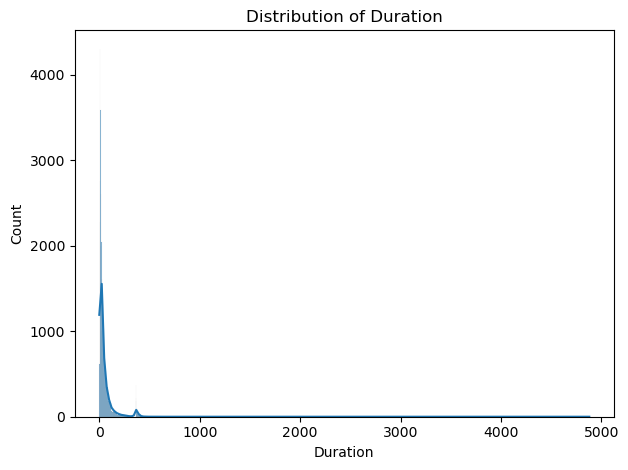

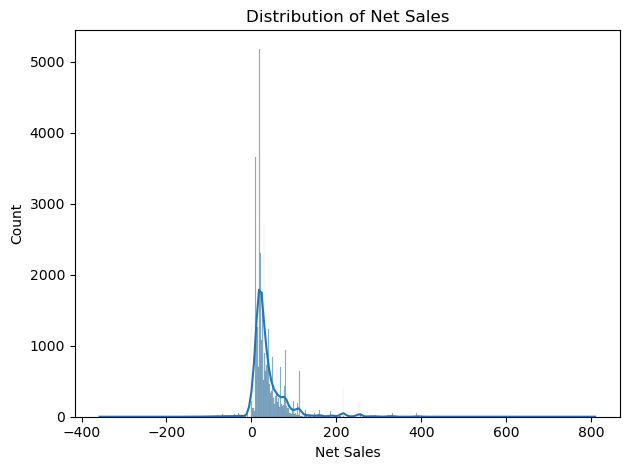

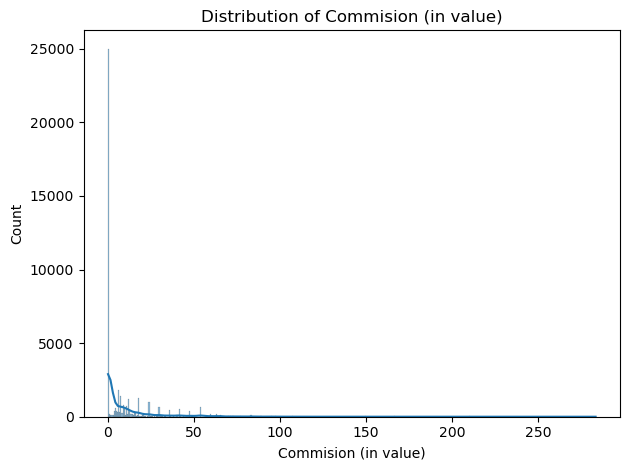

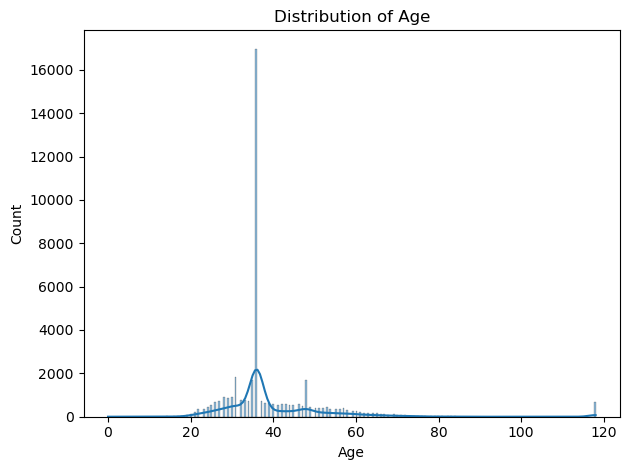

In [37]:
# Plot Distribution of Numerical Variables #
for i in num_cols:
    sns.histplot(df[i], kde = True)
    plt.title(f'Distribution of {i}')
    plt.tight_layout()
    plt.show()

**INSIGHT**

- Duration vs. Claim
  - Longer duration policies might have higher claim rates (e.g., more exposure time), but the graph suggests no stark divide.

- Net Sales vs. Claim
  - Higher net sales policies (premiums) might correlate with claims (e.g., more coverage leads to more claims), but negative values (cancellations) likely have no claims.

- Age vs. Claim
  - Middle-aged customers (40–60) might file more claims (e.g., families traveling, higher risk awareness), but the distribution is similar for both classes.

- Commission vs. Claim
  - Higher commissions (from expensive policies) might correlate with claims, but the skew makes it hard to discern.

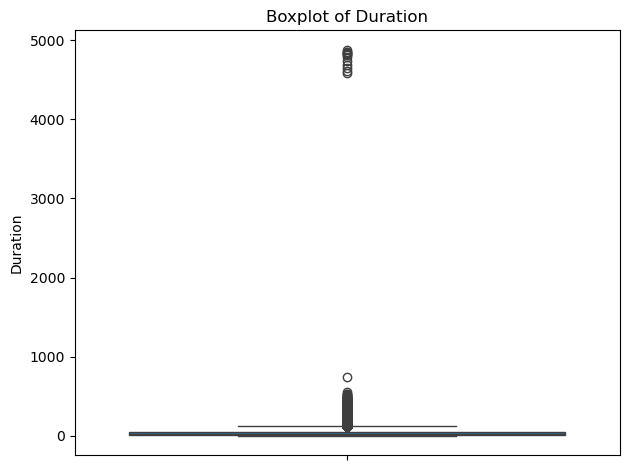

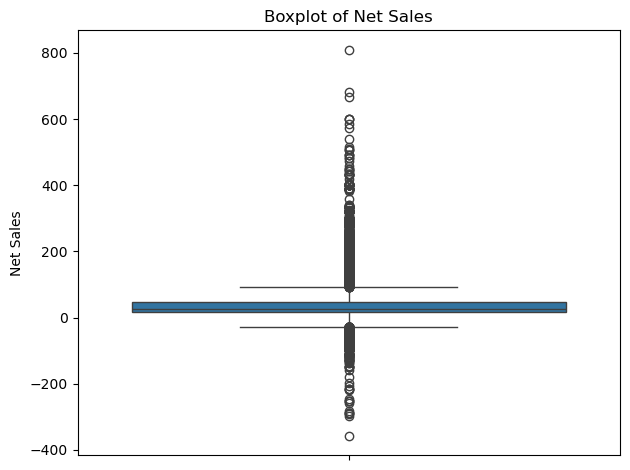

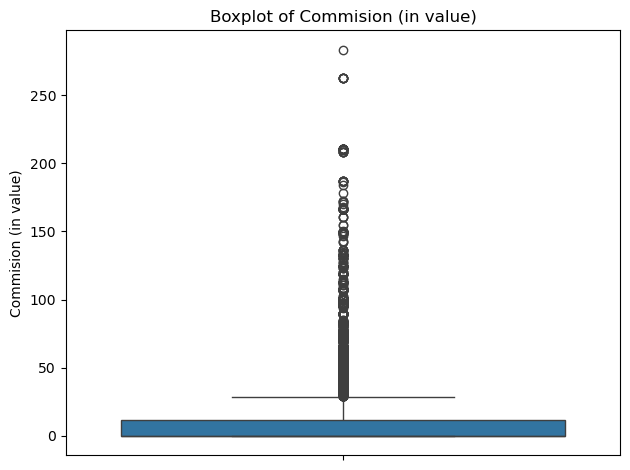

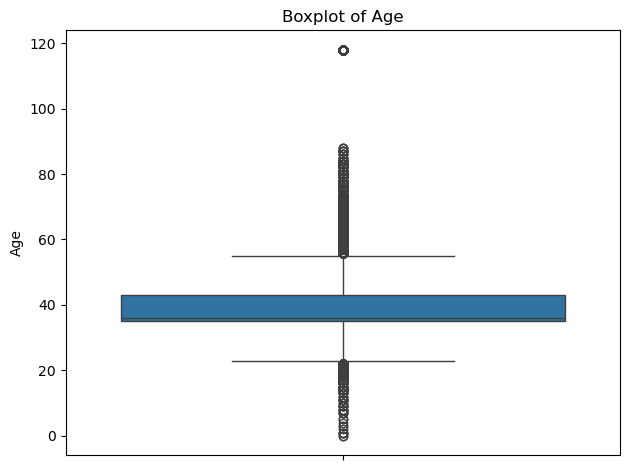

In [39]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.tight_layout()
    plt.savefig(f'Boxplot of {i}')
    plt.show()

**INSIGHTS**

*Age Boxplot*
- Median around 40 y.o
- Very few outlier, aging below 20 and above 100

*Commission (in value) Boxplot*
- Most commission are low
- Very few high commission
  
*Duration Boxplot*
- Outlier beyond / up to 350
  
*Net Sales Boxplot*
- Negative value indicate refunds/cacellations

#### Categorical Variables

In [42]:
cat_cols = df.describe(include = 'object').columns
cat_cols

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Destination', 'Claim'],
      dtype='object')

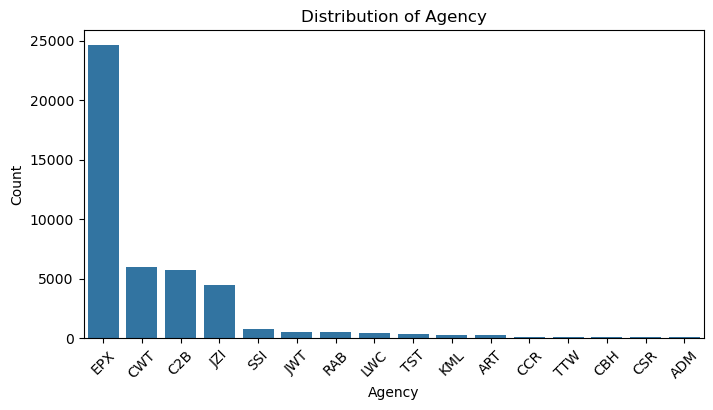

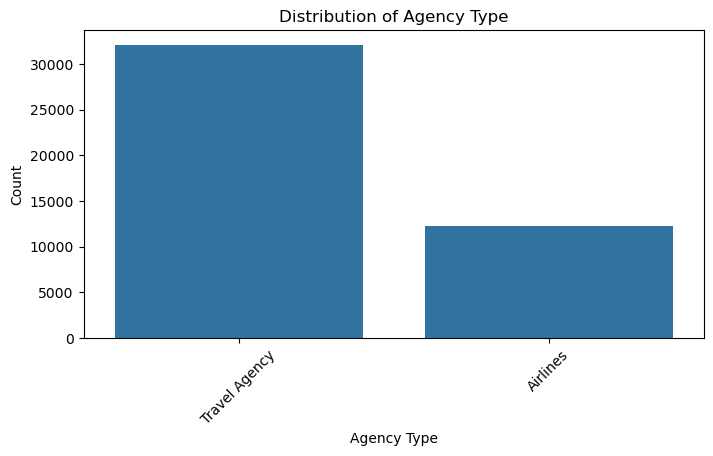

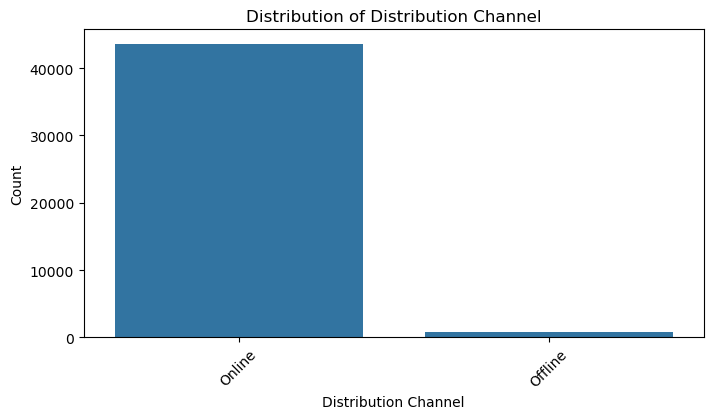

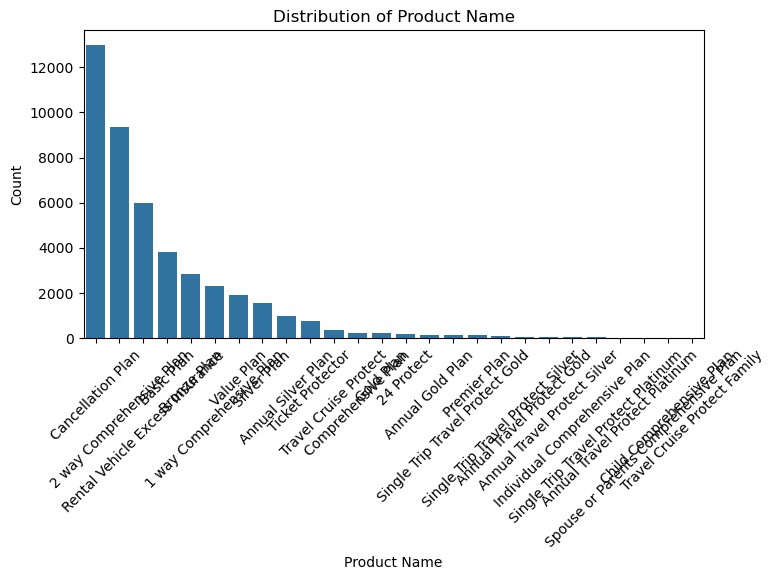

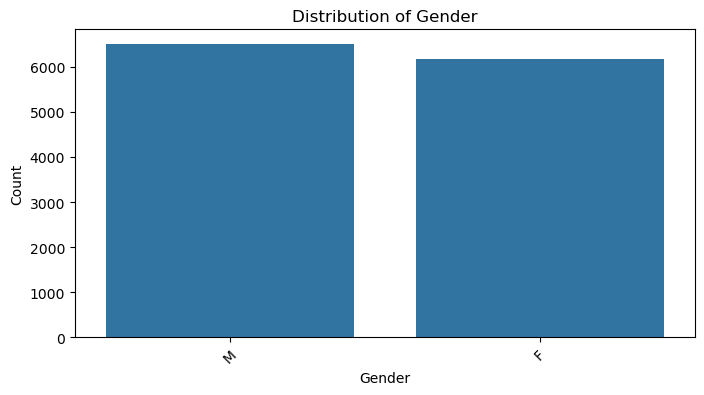

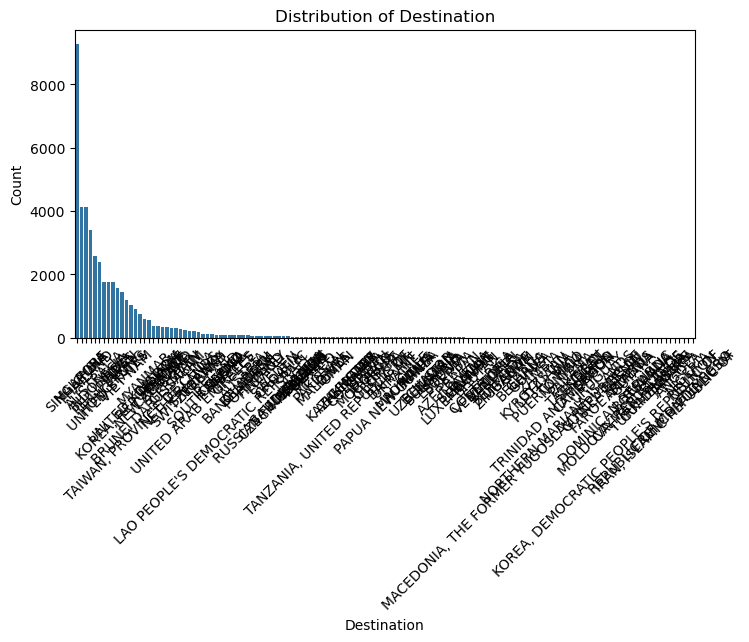

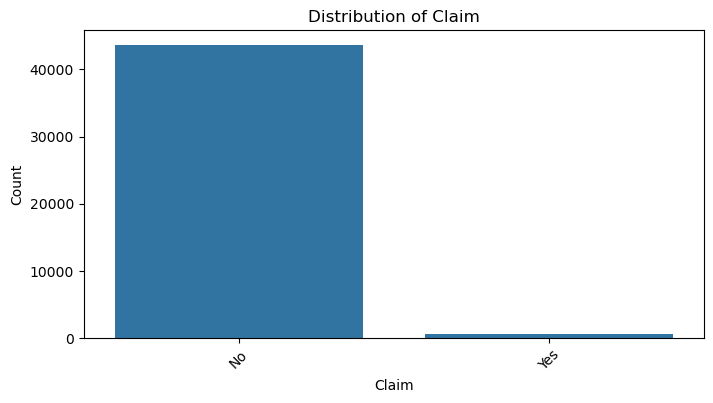

In [43]:
import seaborn as sns

for i in cat_cols:
    plt.figure(figsize=(8,4))
    value_counts = df[i].value_counts()
    #if len(value_counts) > 10:
        #value_counts = value_counts.head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.savefig(f'Distribution of {i}')
    plt.show()

##### Bivariate Plots

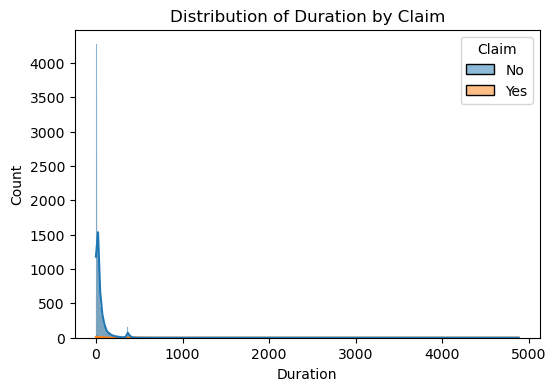

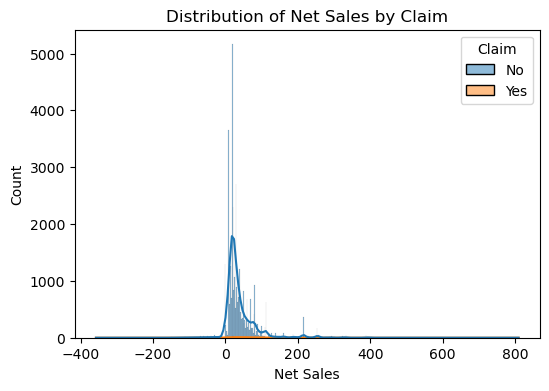

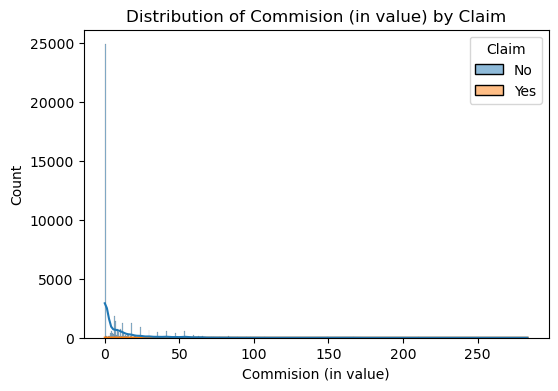

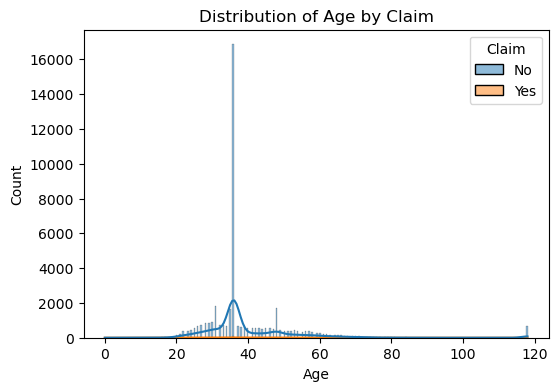

In [45]:
for i in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=i, hue='Claim', kde=True)
    plt.title(f"Distribution of {i} by Claim")
    #plt.savefig(f'Distributiion of {i} by Claim')
    plt.show()

In [46]:
# Categorical Columns #
cat_cols = df.select_dtypes(include = 'object').columns
cat_cols

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Gender', 'Destination', 'Claim'],
      dtype='object')

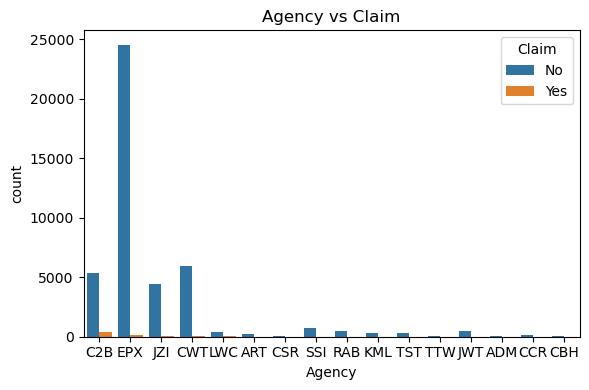

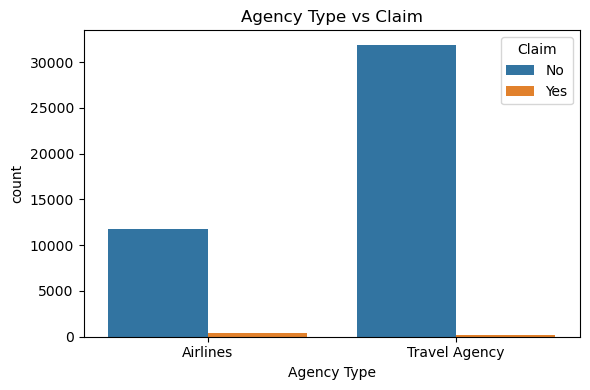

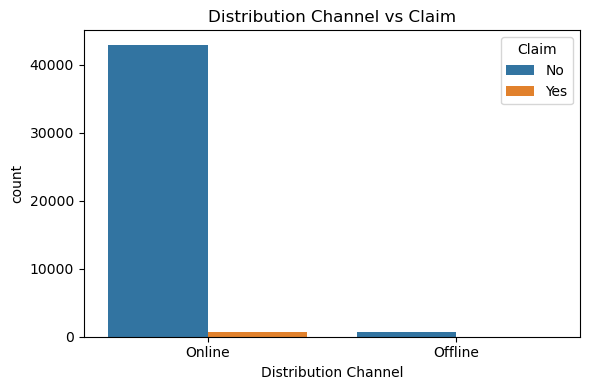

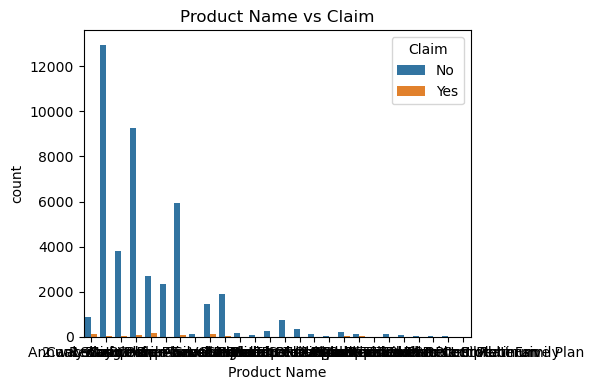

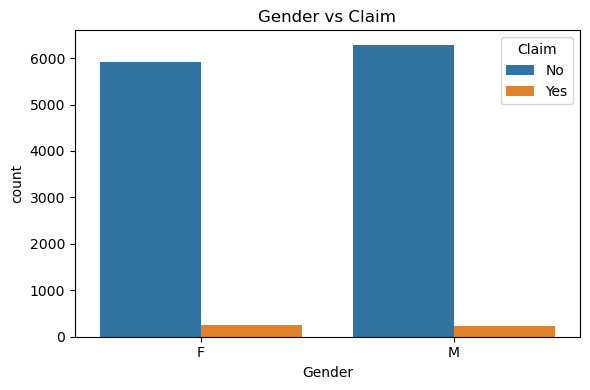

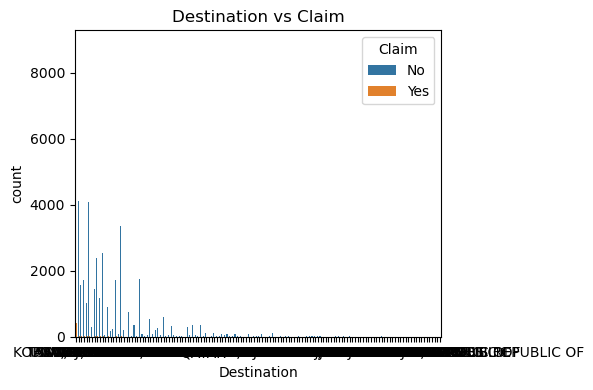

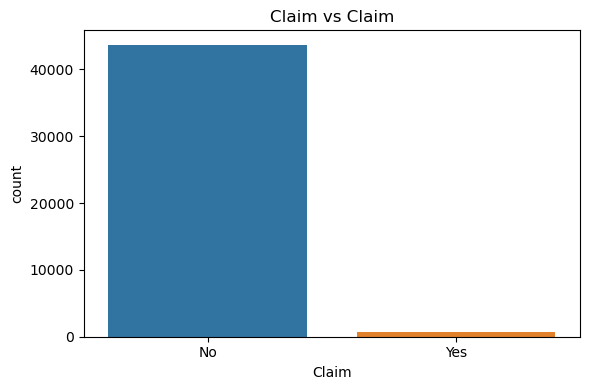

In [47]:
for i in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i, hue='Claim', data=df)
    plt.title(f'{i} vs Claim')
    plt.tight_layout()
    #plt.savefig(f'{i} vs Claim')
    plt.show()

In [48]:
df['Product Name'].nunique()

26

In [49]:
df['Destination'].nunique()

138

### Bivariate Analysis

##### Correlation Analysis

###### Claim Vs. Numerical Columns

In [53]:
num_cols

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')

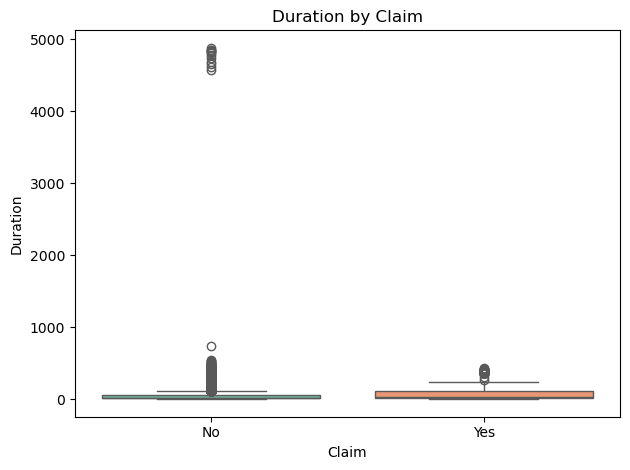

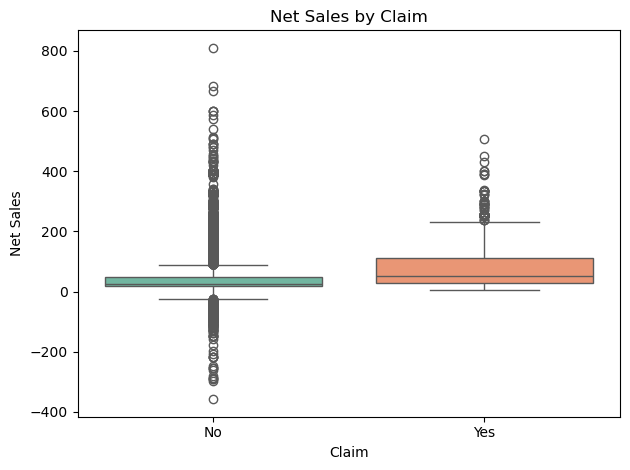

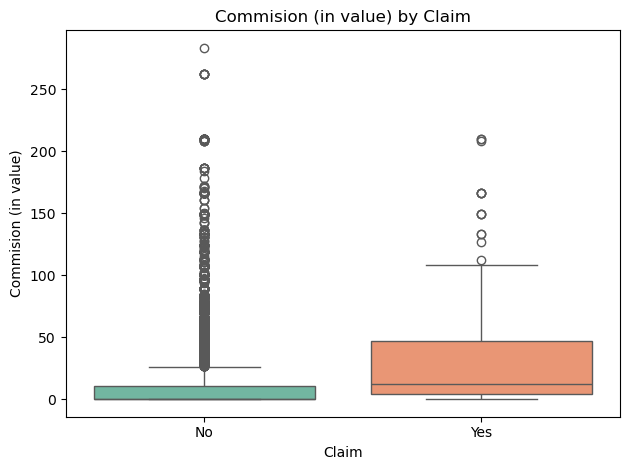

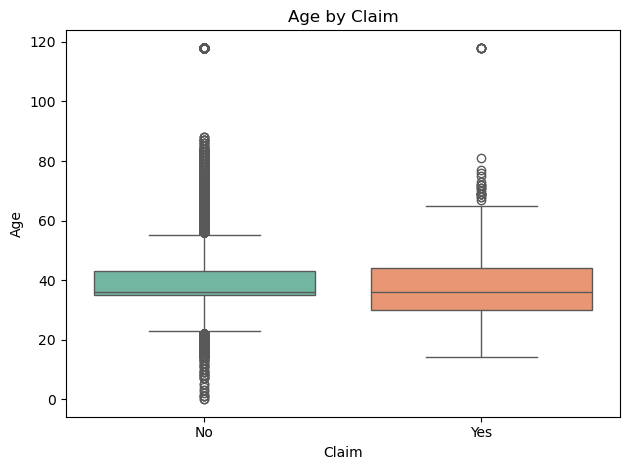

In [54]:
for i in num_cols:
    sns.boxplot(x = 'Claim', y = i, data = df, palette = 'Set2', hue = 'Claim')
    plt.title(f'{i} by Claim')
    plt.tight_layout()
    plt.savefig(f'{i} by Claim')
    plt.show()

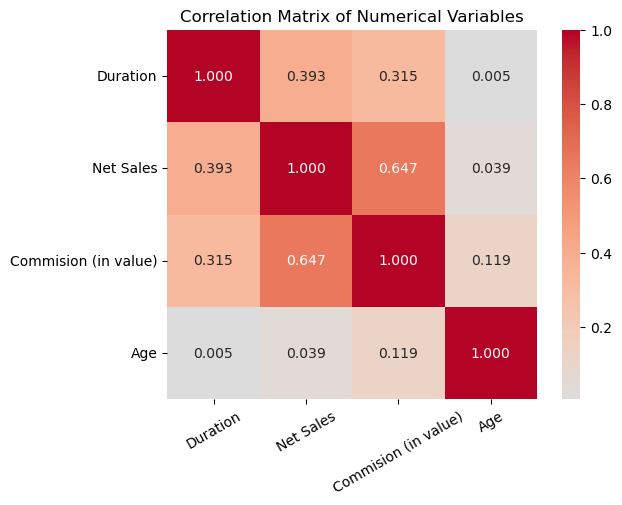

In [55]:
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, square=True, fmt=".3f")
plt.title("Correlation Matrix of Numerical Variables")
plt.xticks(rotation = 30)
plt.show()

##### Claim Vs. Categorical Columns

#### Categorical Claim Check

- 0 : No Claim
- 1 : Claim

In [58]:
# Sparsity check in categorical columns #
cat_summary = df[cat_cols].nunique().reset_index()
cat_summary.columns = ["Column", "Unique_Values"]
print(cat_summary)

                 Column  Unique_Values
0                Agency             16
1           Agency Type              2
2  Distribution Channel              2
3          Product Name             26
4                Gender              2
5           Destination            138
6                 Claim              2


In [59]:
pd.set_option('display.max_rows', None)
destination_claim = (df.groupby(['Destination', 'Claim']).size().unstack(fill_value = 0).reset_index())
destination_claim['Claim Rate (%)'] = destination_claim['Yes'] / (destination_claim['No'] + destination_claim['Yes']) * 100
destination_claim = destination_claim.sort_values(by = 'Claim Rate (%)', ascending = False).reset_index()
destination_claim = destination_claim.drop(columns = ['index'])
destination_claim.index.name = 'Claim'
destination_claim

Claim,Destination,No,Yes,Claim Rate (%)
Claim,,,,
0,COSTA RICA,3,1,25.000000
1,CZECH REPUBLIC,41,2,4.651163
2,SINGAPORE,8850,417,4.499838
3,ICELAND,76,3,3.797468
4,ISRAEL,32,1,3.030303
5,ITALY,310,6,1.898734
6,TURKEY,54,1,1.818182
7,SOUTH AFRICA,111,2,1.769912
8,FRANCE,335,6,1.759531


In [60]:
# 1. Group by Product Name and Claim counts
claim_product = df.groupby(["Product Name", "Claim"]).size().unstack(fill_value=0)

# 2. Add a Claim Rate (%) column
claim_product["Total"] = claim_product.sum(axis=1)
claim_product["Claim Rate (%)"] = (claim_product['Yes'] / claim_product["Total"]) * 100

# 3. Sort by claim rate (optional)
claim_product = claim_product.sort_values("Claim Rate (%)", ascending=False)

print(claim_product)

Claim                                    No  Yes  Total  Claim Rate (%)
Product Name                                                           
Annual Gold Plan                        126   16    142       11.267606
Annual Silver Plan                      866  109    975       11.179487
Annual Travel Protect Gold               56    7     63       11.111111
Single Trip Travel Protect Platinum      42    5     47       10.638298
Spouse or Parents Comprehensive Plan     12    1     13        7.692308
Silver Plan                            1444  108   1552        6.958763
Annual Travel Protect Silver             55    4     59        6.779661
Annual Travel Protect Platinum           32    2     34        5.882353
Bronze Plan                            2685  162   2847        5.690200
Single Trip Travel Protect Gold         128    7    135        5.185185
Gold Plan                               225   12    237        5.063291
Single Trip Travel Protect Silver       113    4    117        3

In [61]:
# Claim per Agency #
claim_agency = df.groupby(["Agency", "Claim"]).size().unstack(fill_value=0)

claim_agency["Total"] = claim_agency.sum(axis=1)
claim_agency["Claim Rate (%)"] = (claim_agency['Yes'] / claim_agency["Total"]) * 100

claim_agency = claim_agency.sort_values("Claim Rate (%)", ascending=False)

print(claim_agency)

Claim      No  Yes  Total  Claim Rate (%)
Agency                                   
C2B      5346  407   5753        7.074570
LWC       426   29    455        6.373626
KML       276    5    281        1.779359
CCR       124    2    126        1.587302
CSR        67    1     68        1.470588
CBH        68    1     69        1.449275
TTW        68    1     69        1.449275
CWT      5916   64   5980        1.070234
JWT       518    4    522        0.766284
SSI       760    5    765        0.653595
TST       352    2    354        0.564972
EPX     24523  133  24656        0.539422
JZI      4411   22   4433        0.496278
RAB       512    1    513        0.194932
ADM        55    0     55        0.000000
ART       229    0    229        0.000000


In [62]:
pd.reset_option('display.max_rows')

#### Target Distribution

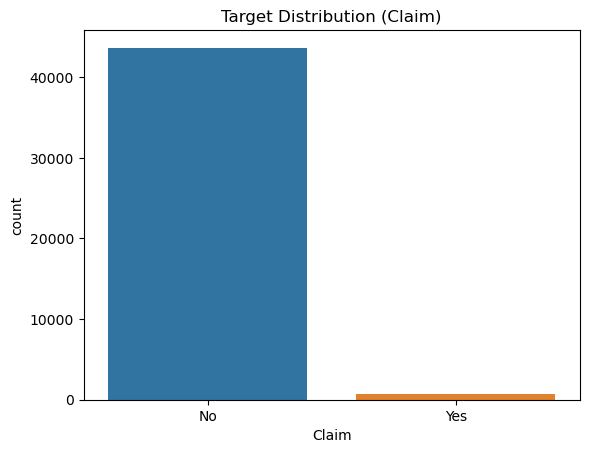

In [64]:
sns.countplot(x='Claim', data=df, hue = 'Claim')
plt.title("Target Distribution (Claim)")
plt.show()

In [65]:
# Sparsity check for cat_cols #
for col in cat_cols:
    print(col, ":", df[col].nunique())

Agency : 16
Agency Type : 2
Distribution Channel : 2
Product Name : 26
Gender : 2
Destination : 138
Claim : 2


In [66]:
df['Agency Type'].unique()

array(['Airlines', 'Travel Agency'], dtype=object)

## Feature Grouping for Preprocessing
Due to high sparsity and dimensionality, many categorical values in `cat_cols` such as `Agency`, `Product Name`, and `Destination` can be observed to consists of high numbers of unique values. Recklessly conducting One-Hot Encoder into these columns could result in 'explosion' of features and risk of overfitting due to the sheer number of unique value, hence, grouping the features can reduce the risk of overfitting and improve overal estimate stability. Additionally, fewer feature also increase the speed of training and less variance across folds.

---

## Feature Columns Reasoning

### Agency
- Problem : Very high cardinality (many unique agency names)
- Grouping: :
  - Top Agencies (Top 5 by claim)
  - Others
- Reason : To reduce the number of features.

### Agency Type
- Problem: None, only 2 categories (Airlines and Travel Agency)
- Group : Keep as is
- Reason: Low cardinality hence no need to group.

### Distribution Channel
- Problem: None, only 2 categories (Online and Offline)
- Group : Keep as is
- Reason: Low cardinality hence no need to group.

### Product Name
- Problem: High Cardinality
- Grouping:
  - Top Products
  - Others
- Reason: To reduce the number of features

### Gender
- Problem : 3 types of genders (Male, Female, Unknown)
- Group : Keep as is
- Reason: Will be using `drop = 'first'` encoding later on

### Destination
- Problem : High Cardinality (Over 100+ countries)
- Group   :
  - Top 5 countries by claim
  - Others
- Reason : To reduce the number of features

### Numerical Features 
- No grouping needed
- Outliers treated with capping

---

In [68]:
cat_map = df[['Agency', 'Product Name', 'Gender', 'Destination']]
cat_nomap = df[['Agency Type', 'Distribution Channel']]

## Metric Evaluation

In [70]:
# Count of each class #
print(df['Claim'].value_counts())

# Percentage of each class #
print(df['Claim'].value_counts(normalize=True) * 100)

Claim
No     43651
Yes      677
Name: count, dtype: int64
Claim
No     98.472749
Yes     1.527251
Name: proportion, dtype: float64


### Confusion Matrix Explanation  

|                       | Predicted: No Claim (0) | Predicted: Claim (1) |
|-----------------------|--------------------------|-----------------------|
| **Actual: No Claim (0)** | **TN** – Correctly predicted no claim | **FP** – Predicted claim, but actually no claim |
| **Actual: Claim (1)**    | **FN** – Missed an actual claim | **TP** – Correctly predicted claim |

---

### Metrics (in terms of Confusion Matrix)

- **Accuracy** = (TP + TN) / (TP + TN + FP + FN)  
- **Precision** = TP / (TP + FP) → of all predicted claims, how many are correct  
- **Recall (Sensitivity / TPR)** = TP / (TP + FN) → of all actual claims, how many are caught  
- **F1-score** = 2 × (Precision × Recall) / (Precision + Recall) → harmonic mean of Precision & Recall  
- **Specificity (TNR)** = TN / (TN + FP) → of all actual no-claims, how many are correctly identified  
- **ROC-AUC** → plots TPR vs. FPR across thresholds  
  - **TPR (Recall)** = TP / (TP + FN)  
  - **FPR** = FP / (FP + TN)  

---

### Insight  
- With imbalanced data (~98% No Claim, ~2% Claim), high **Accuracy** can still mean the model misses all claims (TP = 0).  
- That’s why we focus on **Recall, Precision, F1, and ROC-AUC** to evaluate the model fairly.

### Reason

- Recall (TP / (TP + FN))
  - Measures how many actual claims the model successfully catches.
  - Important because missing a claim (FN) can be very costly for insurers.
  - High Recall ensures we don’t overlook too many risky cases.

- Precision (TP / (TP + FP))
  - Measures how many of the predicted claims are actually true.
  - Important because too many false positives (FP) would waste resources investigating/paying attention to customers who won’t claim.

- F1-score (harmonic mean of Precision & Recall)
  - Balances the trade-off between Precision and Recall.
  - Useful when we care about both catching claims and avoiding too many false alarms.

- ROC-AUC / PR-AUC
  - Measures the model’s ability to distinguish between Claim and No Claim across different thresholds.
  - ROC-AUC is good for overall separability, while PR-AUC is better for imbalanced datasets.
  
**Chosen Metrics:** **Recall, Precision, F1-Score, and ROC-AUC** instead of Accuracy because the dataset is highly imbalanced (≈98% No Claim vs 2% Claim).  
- **Recall** ensures actual claims are not missed (low FN).  
- **Precision** ensures predicted claims are meaningful (low FP).  
- **F1-Score** balances Recall and Precision.  
- **ROC-AUC** evaluates overall model separability across thresholds.  


## Data Cleaning
---
In this section, we handle missing values, outliers, and prepare the target variable.

- **Missing Values:**  
  - `Gender` has many missing values (~70%). We fill them with `"Unknown"` to avoid data loss.  

- **Outliers:**  
  - `Duration`: Cap at 365 days (trips longer than a year are unrealistic).  
  - `Net Sales` and `Commision (in value)`: Cap outliers using the Interquartile Range (IQR) method.  
  - `Age`: Cap at 100 (values above this are unrealistic).  

- **Target Encoding:**  
  - Encode `Claim`: `Yes` → 1, `No` → 0.  

## Data Cleaning

In [74]:
# Handling Missing Values #
df['Gender'] = df['Gender'].fillna('Unknown')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                44328 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


### Handling Outlier

Explain assumptions

In [78]:
# Handling Outlier #
import numpy as np

# Duration #
df['Duration'] = np.where(df['Duration'] > 365, 365, df['Duration'])

# Net Sales and Commission #
for i in ['Net Sales', 'Commision (in value)']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_cap = Q1 - 1.5 * IQR
    high_cap = Q3 + 1.5 * IQR
    df[i] = np.where(df[i] > high_cap, high_cap,
                    np.where(df[i] < low_cap, low_cap, df[i]))

# Age Cap #
df['Age'] = np.where(df['Age'] > 100, 100, df['Age'])

# Encode Claim #
df['Claim'] = df['Claim'].map({'Yes': 1, 'No': 0})

df 

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,93.0,28.875,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,Unknown,4,MALAYSIA,10.0,0.000,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.700,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,20,UNITED STATES,93.0,0.000,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.000,28,0
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,14,CHINA,30.0,0.000,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,Unknown,17,AUSTRALIA,79.2,28.875,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.500,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,Unknown,51,CHINA,36.0,0.000,36,0


## Feature Engineering
---
In this step, we prepare the dataset for modeling:

- **Feature Split:**
  - num_cols: Duration, Net Sales, Commision (in value), Age
  - cat_cols: Agency, Agency Type, Distribution Channel, Product Name, Gender, Destination

- **Encoding & Scaling Strategy:**
  - Numerical: impute (median) + StandardScaler
  - Categorical: impute (most frequent) + OneHotEncoder

In [80]:
num_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']

In [81]:
# Checking Missing Value in num_cols #
num_missing = df[num_cols].isnull().sum()
num_missing

Duration                0
Net Sales               0
Commision (in value)    0
Age                     0
dtype: int64

In [82]:
cat_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Gender', 'Destination']
cat_cols

['Agency',
 'Agency Type',
 'Distribution Channel',
 'Product Name',
 'Gender',
 'Destination']

In [83]:
# Check Missing Values in cat_cols #
cat_missing = df[cat_cols].isnull().sum()
cat_missing

Agency                  0
Agency Type             0
Distribution Channel    0
Product Name            0
Gender                  0
Destination             0
dtype: int64

In [84]:
# Map Categorical Columns #

def map_cat(df):
    # Gender#
    df['Gender'] = df['Gender'].fillna("Other")

    # Destination #
    top_dest = df["Destination"].value_counts().nlargest(3).index
    df["Destination"] = df["Destination"].apply(lambda x: x if x in top_dest else "Other") 

    # Product Name #
    top_prod = df["Product Name"].value_counts().nlargest(4).index
    df["Product Name"] = df["Product Name"].apply(lambda x: x if x in top_prod else "Other")

    # Agency #
    top_agency = df["Agency"].value_counts().nlargest(2).index
    df["Agency"] = df["Agency"].apply(lambda x: x if x in top_agency else "Other")
    return df

df_mapped = map_cat(df.copy())

## Train Test Split

In [86]:
from sklearn.model_selection import train_test_split
# Feature and Target #
X = df_mapped.drop(columns = 'Claim')
y = df_mapped['Claim']

# Train Test Split #
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y
                                                   )

### Preprocessing

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [89]:
# Numeric Transformer #
num_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Categorical Transformer #
cat_transformer = Pipeline(steps=[
    # ('map', FunctionTransformer(map_cat, validate = False)), # Allow the transformer to accept a DataFrame directly #
    ("onehot", OneHotEncoder(drop='first', handle_unknown="ignore"))
])

# Combine Transformers #
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

preprocessor

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


---

## Modeling: Model Selection

**Assumptions**

- Highly imbalance dataset
- Most specimen do not make claim (**No** = Majority, **Yes** = Minority)
- If we use normal random splitting, some splits might end up with very few “Yes” cases, which would make the model biased or unreliable

---

**Solution**

- Use Stratified K-Fold Cross Validation.
  - This makes sure that each split has the same ratio of Yes and No as the full dataset.
  - Ensures that the model is always teeseted on data that has *realistic balance* of claim vs no-claim.
- Use ROC-AUC as the main metric.
  - ROC-AUC looks at the model ransk claim vs no-claim across all possible threshold.
  - Higher AUC means model is **better at telling customer that will make a claim**.


  

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

In [94]:
# Define Models #
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [95]:
# Cross Validation Scheme #
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [96]:
# Cross Validation Result #
results = []

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    roc = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="roc_auc")
    
    results.append({
        "Model": name,
        "ROC-AUC": roc.mean()
    })

df_results = pd.DataFrame(results).set_index("Model")
display(df_results.sort_values(by="ROC-AUC", ascending=False))

,ROC-AUC
Model,
Logistic Regression,0.822186
XGBoost,0.782788
Random Forest,0.681899
Support Vector Machine,0.637576
K-Nearest Neighbors,0.573365


| Model                 | ROC-AUC | Insight |
|------------------------|---------|---------|
| Logistic Regression    | **0.822** | Best performing model. Even though it’s simple, it handles imbalanced data well (especially if probabilities are calibrated). |
| XGBoost               | 0.783   | Strong performer, but slightly lower than Logistic Regression. May improve with hyperparameter tuning. |
| Random Forest         | 0.682   | Moderate performance. Possibly struggling with class imbalance or requires tuning. |
| Support Vector Machine | 0.638   | Weak performance compared to others. SVM may not scale well with many features after one-hot encoding. |
| K-Nearest Neighbors   | 0.573   | Performs the worst. Likely affected by high dimensionality (many encoded features) and imbalance. |

---

**Key Takeaways**

- **Logistic Regression is the winner** → simple, interpretable, and effective for this dataset.  
- **Boosting methods (XGBoost)** are promising but need proper tuning (learning rate, depth, scale_pos_weight).  
- **Tree-based Random Forest** underperformed, which suggests imbalance and feature sparsity affect it.  
- **SVM and KNN** are not suitable here because the dataset has high cardinality categorical variables (after encoding) and is imbalanced.

---

**Best Models**

- **Logistic Regression**
- **XGBoost**




In [98]:
best_models = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
}

In [99]:
from sklearn.metrics import roc_auc_score, recall_score

In [100]:
# modeling #
results = []
for name, model in best_models.items():
    pipe = Pipeline([('preprocessor', preprocessor),
                    ('classifier', model)])

    
    # fit to data train for metrics in test #
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_pred_proba = pipe.predict_proba(X_test)[:,1]

    # Evaluation Metrics #
    rec_test = recall_score(y_test, y_pred)
    roc_test = roc_auc_score(y_test, y_pred_proba)
    
    # Store score to Metrics #
    results.append({"Model": name,
                   "Recall Test": rec_test,
                   "ROC-AUC Test": roc_test})
    
df_result = pd.DataFrame(results)
df_result

,Model,Recall Test,ROC-AUC Test
0,Logistic Regression,0.0,0.828675
1,XGBoost,0.0,0.777693


**INSIGHT**

- **Logistic Regression** achieves the highest ROC-AUC (~0.83), meaning it separates claim vs no-claim better than other models.

**Next Step**

- Proceed with **Logistic Regression** as the chosen model.
- Perform **multicollinearity check using Variance Inflation Factor (VIF)** to ensure independent variables are not highly correlated.
- Consider adjusting the classification threshold or applying class balancing techniques to improve Recall.

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Fit numeric transformer manually #
X_num = num_transformer.fit_transform(X_train[num_cols])

# Fit catetgorical transformer manually #
X_cat = cat_transformer.fit_transform(X_train[cat_cols])

# Numerical Features #
num_features = num_cols

# Categorical Features #
cat_features = cat_transformer.named_steps['onehot'].get_feature_names_out(cat_cols)

# Combine #
feature_names = list(num_features) + list(cat_features)

# Combine transformed X #
X_trans = np.hstack([X_num, X_cat.toarray()])  # if sparse, convert to dense
X_df = pd.DataFrame(X_trans, columns=feature_names)

# Make Df #
X_df = pd.DataFrame(X_trans, columns=feature_names)

# Calculate VIF #
vif_data = pd.DataFrame()
vif_data["Feature"] = X_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_df.values, i)
                   for i in range(X_df.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))

                                         Feature         VIF
4                                     Agency_EPX  191.610385
5                                   Agency_Other   45.917655
11  Product Name_Rental Vehicle Excess Insurance   44.899478
6                      Agency Type_Travel Agency   13.283653
13                                Gender_Unknown   12.010430
2                           Commision (in value)    6.482445
10                            Product Name_Other    4.991276
15                         Destination_SINGAPORE    3.896624
8                        Product Name_Basic Plan    3.680465
14                             Destination_Other    3.143791
7                    Distribution Channel_Online    1.931559
16                          Destination_THAILAND    1.833023
9                 Product Name_Cancellation Plan    1.820957
12                                      Gender_M    1.785870
1                                      Net Sales    1.708508
0                       

### VIF Results & Interpretation

| Feature                                         | VIF    | Interpretation                                                                 |
|-------------------------------------------------|--------|---------------------------------------------------------------------------------|
| `Agency_EPX`                                    | 191.6  | Extremely high → strongly collinear with other features. Should be removed/merged. |
| `Agency_Other`                                  | 45.9   | Very high → redundant, likely overlaps with other agency categories.             |
| `Product Name_Rental Vehicle Excess Insurance`  | 44.9   | Very high → correlated with other product features.                              |
| `Agency Type_Travel Agency`                     | 13.3   | High → multicollinearity issue.                                                 |
| `Gender_Unknown`                                | 12.0   | High → correlated with other gender categories.                                 |
| Others (< 10)                                   | Acceptable | No strong multicollinearity.                                                     |

**Key Insight**
- Several categorical dummy variables show **very high VIF** (especially Agency and Product Name).  
- High VIF (>10) means multicollinearity, which can destabilize Logistic Regression coefficients.  
- Random Forest/XGBoost are less sensitive, but for Logistic Regression, we should **drop or regularize** these features.  


In [104]:

# list of features to drop
drop_features = [
    'cat__Agency_EPX',
    'cat__Agency_Other',
    'cat__Product Name_Rental Vehicle Excess Insurance',
    'cat__Agency Type_Travel Agency',
    'cat__Gender_Unknown'
]

# custom dropper
def drop_high_vif_features(X):
    # Convert to DataFrame if input is array
    if not isinstance(X, pd.DataFrame):
        # Only keep numeric columns + one-hot encoded categorical columns
        cat_cols_ohe = cat_transformer.named_steps['onehot'].get_feature_names_out(cat_cols)
        all_cols = list(num_cols) + list(cat_cols_ohe)
        X = pd.DataFrame(X, columns=all_cols)
    # Drop the high VIF features if they exist
    return X.drop(columns=[c for c in drop_features if c in X.columns], errors='ignore')

dropper = FunctionTransformer(drop_high_vif_features, validate=False)


# full pipeline
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("drop_vif", dropper),
    ("classifier", LogisticRegression(max_iter=500))
])

## Handling Imbalance

In [106]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

In [107]:
# 1. Numeric column names
num_feature_names = num_cols

# 2. Categorical column names from one-hot encoder
cat_feature_names = cat_transformer.named_steps['onehot'].get_feature_names_out(cat_cols)

# 3. Combine
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

print(all_feature_names)

['Duration' 'Net Sales' 'Commision (in value)' 'Age' 'Agency_EPX'
 'Agency_Other' 'Agency Type_Travel Agency' 'Distribution Channel_Online'
 'Product Name_Basic Plan' 'Product Name_Cancellation Plan'
 'Product Name_Other' 'Product Name_Rental Vehicle Excess Insurance'
 'Gender_M' 'Gender_Unknown' 'Destination_Other' 'Destination_SINGAPORE'
 'Destination_THAILAND']


In [108]:
# Logistic Regression Models
logreg = LogisticRegression(class_weight=None, random_state=42)
logreg_balanced = LogisticRegression(class_weight='balanced', random_state=42)

# Metrics for evaluation
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
}

# Stratified K-Fold for cross-validation
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plain Logistic Regression (with preprocessing + drop)
pipeline_logreg = Pipeline([
    ('preprocessor', preprocessor),
    ('drop_vif', dropper),
    ('model', logreg)
])

pipeline_balanced = Pipeline([
    ('preprocessor', preprocessor),
    ('drop_vif', dropper),
    ('model', logreg_balanced)
])

pipeline_ros = ImbPipeline([
    ('preprocessor', preprocessor),
    ('drop_vif', dropper),
    ('ros', RandomOverSampler(random_state=42)),
    ('model', logreg)
])

pipeline_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('drop_vif', dropper),
    ('smote', SMOTE(random_state=42)),
    ('model', logreg)
])

In [109]:
# Cross-validation
cv_no_resample = cross_validate(pipeline_logreg, X_train, y_train, cv=skfold, scoring=scoring)
cv_ros         = cross_validate(pipeline_ros, X_train, y_train, cv=skfold, scoring=scoring)
cv_smote       = cross_validate(pipeline_smote, X_train, y_train, cv=skfold, scoring=scoring)
cv_balanced    = cross_validate(pipeline_balanced, X_train, y_train, cv=skfold, scoring=scoring)

In [110]:
# Fit all pipelines on training data
pipeline_logreg.fit(X_train, y_train)
pipeline_balanced.fit(X_train, y_train)
pipeline_ros.fit(X_train, y_train)
pipeline_smote.fit(X_train, y_train)

# Predictions
y_pred_no_resample = pipeline_logreg.predict(X_test)
y_pred_balanced    = pipeline_balanced.predict(X_test)
y_pred_ros         = pipeline_ros.predict(X_test)
y_pred_smote       = pipeline_smote.predict(X_test)

# Probabilities
y_proba_no_resample = pipeline_logreg.predict_proba(X_test)[:, 1]
y_proba_balanced    = pipeline_balanced.predict_proba(X_test)[:, 1]
y_proba_ros         = pipeline_ros.predict_proba(X_test)[:, 1]
y_proba_smote       = pipeline_smote.predict_proba(X_test)[:, 1]

In [111]:
# Evaluation function

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate(y_true, y_pred, y_proba):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'roc_auc': roc_auc_score(y_true, y_proba),
        'f1': f1_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred),
        'recall': recall_score(y_true, y_pred)
    }

test_scores = pd.DataFrame({
    "Metric": list(scoring.keys()),
    "No Resampling": list(evaluate(y_test, y_pred_no_resample, y_proba_no_resample).values()),
    "ROS": list(evaluate(y_test, y_pred_ros, y_proba_ros).values()),
    "SMOTE": list(evaluate(y_test, y_pred_smote, y_proba_smote).values()),
    "Class Weight": list(evaluate(y_test, y_pred_balanced, y_proba_balanced).values())
})

In [112]:

# Display results
print("\nCross-validation (mean scores)")
print(f"No Resampling:\n{pd.DataFrame(cv_no_resample).mean()}")
print(f"\nROS:\n{pd.DataFrame(cv_ros).mean()}")
print(f"\nSMOTE:\n{pd.DataFrame(cv_smote).mean()}")
print(f"\nClass Weight Balanced:\n{pd.DataFrame(cv_balanced).mean()}")

print("\nTest Set Performance:")
print(test_scores.to_string(index=False))


Cross-validation (mean scores)
No Resampling:
fit_time          0.114735
score_time        0.057909
test_accuracy     0.984716
test_roc_auc      0.822186
test_f1           0.000000
test_precision    0.000000
test_recall       0.000000
dtype: float64

ROS:
fit_time          0.226202
score_time        0.056471
test_accuracy     0.765636
test_roc_auc      0.821672
test_f1           0.088845
test_precision    0.047231
test_recall       0.747214
dtype: float64

SMOTE:
fit_time          0.310493
score_time        0.061548
test_accuracy     0.768456
test_roc_auc      0.820896
test_f1           0.089013
test_precision    0.047356
test_recall       0.739840
dtype: float64

Class Weight Balanced:
fit_time          0.147902
score_time        0.055185
test_accuracy     0.765185
test_roc_auc      0.821677
test_f1           0.089279
test_precision    0.047454
test_recall       0.752752
dtype: float64

Test Set Performance:
   Metric  No Resampling      ROS    SMOTE  Class Weight
 accuracy       0.7

### Cross-Validation Results (Mean Scores)

| Strategy              | Accuracy | ROC-AUC | Recall | Precision | F1   | Insight |
|------------------------|----------|---------|--------|-----------|------|---------|
| **No Resampling**      | ~98%     | ~0.82   | 0.00   | 0.00      | 0.00 | Model predicts almost all "No". High accuracy but fails to detect any claims. |
| **ROS (Oversampling)** | ~76%     | ~0.82   | ~75%   | ~0.05     | ~0.09 | Recall improves a lot. Model catches most claims, but with many false alarms. |
| **SMOTE**              | ~77%     | ~0.82   | ~74%   | ~0.05     | ~0.09 | Similar to ROS. No big advantage over simple oversampling. |
| **Class Weight**       | ~76%     | ~0.82   | ~77%   | ~0.05     | ~0.09 | Same trade-off as ROS/SMOTE. More elegant (no synthetic data needed). |


**INSIGHT**

After using different techniques to handle the imbalance, (Random Oversampling, SMOTE, and Class Weights) on the Logistic Regression model, the highest test_recall falls to Class Weight Balanced 

**REASONING**

- Highest Recall is using Class Weight achieving 0.77 recall.
- Other methods gave identical ROC-AUC which is 0.828
---

## Hyperparameter Tuning

In [116]:
pipeline_baseline = Pipeline([
    ('preprocessor', preprocessor),
    ('drop_vif', dropper),
    ('model', logreg_balanced)
])

# Fit on raw train data
pipeline_baseline.fit(X_train, y_train)

# Predictions
y_pred_base = pipeline_baseline.predict(X_test)
y_proba_base = pipeline_baseline.predict_proba(X_test)[:, 1]

In [117]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV


param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    pipeline_baseline,
    param_grid,
    cv=cv,
    scoring='recall',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model from tuning
best_logreg = grid_search.best_estimator_

# Predictions
y_pred_tuned = best_logreg.predict(X_test)
y_proba_tuned = best_logreg.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


In [118]:

# Evaluation Function
def eval_metrics(y_true, y_pred, y_proba):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_proba),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }

baseline_scores = eval_metrics(y_test, y_pred_base, y_proba_base)
tuned_scores = eval_metrics(y_test, y_pred_tuned, y_proba_tuned)

In [119]:

# Compare Results
results_df = pd.DataFrame([baseline_scores, tuned_scores], index=['Baseline', 'Tuned'])
print("Test Set Performance Comparison:")
print(results_df)
print("\nBest Parameters from Grid Search:", grid_search.best_params_)

Test Set Performance Comparison:
          Accuracy   ROC_AUC        F1  Precision   Recall
Baseline  0.767539  0.828476  0.091670   0.048735  0.77037
Tuned     0.767201  0.828497  0.091549   0.048666  0.77037

Best Parameters from Grid Search: {'model__C': 10, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


## Feature Importance

In [121]:

# Get feature names from the preprocessor
all_features = pipeline_baseline.named_steps['preprocessor'].get_feature_names_out()

# Manually drop the same high-VIF features
high_vif_features = [
    'cat__Nacionality_Portuguese',
    'cat__Marital status_single',
    'robust__Curricular units 1st sem (enrolled)',
    'robust__Curricular units 2nd sem (enrolled)'
]
reduced_features = [f for f in all_features if f not in high_vif_features]

# Get coefficients
coefficients = pipeline_baseline.named_steps['model'].coef_[0]

# Build feature importance DataFrame
feature_importance = pd.DataFrame({
    'Feature': reduced_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)

print(feature_importance.head(20))

                                              Feature  Coefficient
8                        cat__Product Name_Basic Plan    -2.574307
13                                cat__Gender_Unknown    -1.445114
9                 cat__Product Name_Cancellation Plan    -1.209393
15                         cat__Destination_SINGAPORE     1.141660
10                            cat__Product Name_Other    -1.117020
5                                   cat__Agency_Other     0.711213
1                                      num__Net Sales     0.522491
4                                     cat__Agency_EPX    -0.373017
14                             cat__Destination_Other     0.314487
16                          cat__Destination_THAILAND     0.247737
6                      cat__Agency Type_Travel Agency     0.227687
7                    cat__Distribution Channel_Online     0.172701
2                           num__Commision (in value)    -0.157317
12                                      cat__Gender_M    -0.15

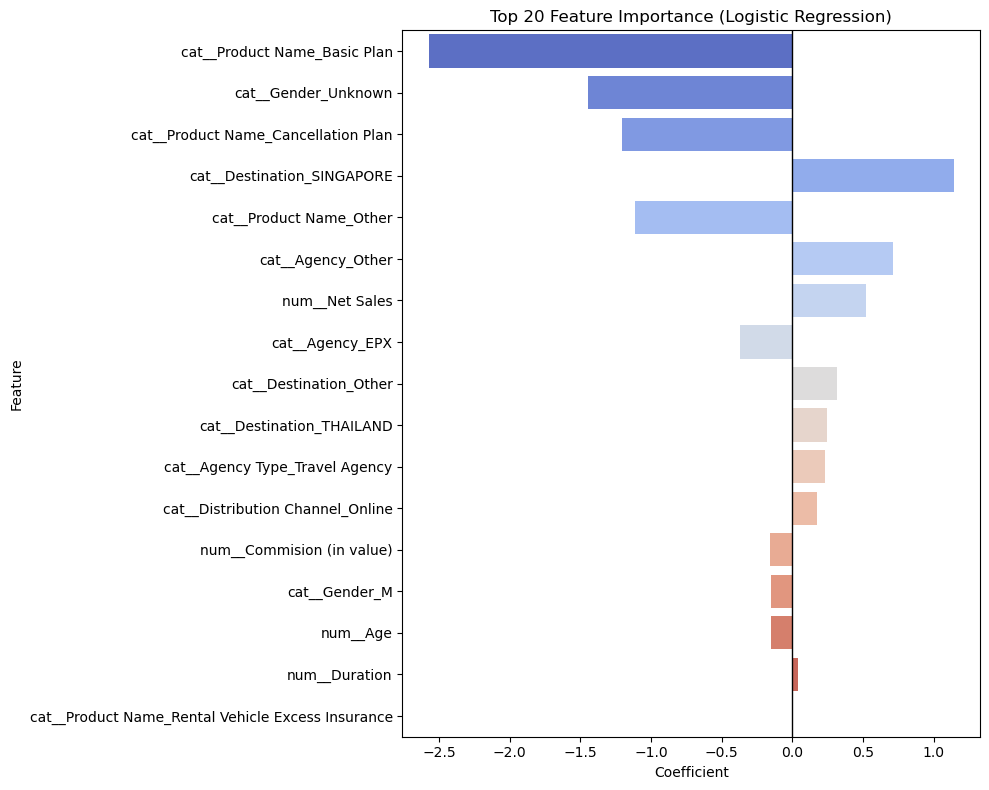

In [122]:
# Plot top 20 features only
top_features = feature_importance.head(20)

plt.figure(figsize=(10, 8))
sns.barplot(data=top_features, x='Coefficient', y='Feature', palette='coolwarm')
plt.title('Top 20 Feature Importance (Logistic Regression)')
plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('Top 20 Feature Importance (Logistic Regression)')
plt.show()

**INSIGHT**

1. Key Positive Predictors
   - Destination = Singapore
     Customer travelling to Singapore are significantly to file claims.
    - Destination = Others/Thailand
      Customer travelling to Thailand also shows positive associated with claims.
    - Agency = Others
      Agencies outside of the top 2 are linked to have higher claim rate.
    - Net Sales
      Higher net sales are slightly associated with higher claim probability possibly due to expensive trips carry higher risk
3. Key Negative Predictors
   - Product Name = Basic Plan
     Customer rarely claim under this product
   - Product Name = Cancellation Plan
     This product shows low claim rate
   - Product Name = Others
     This product shows low claim rate
   - Gender = Unknown
     Observed to show low claim rate possibly due to lack in data recording.
5. Business Insight
   - Singapore and Thailand shows high claim for destination, suggesting location based claim.
   - Agency Channel shows more claim when customer use non-major agencies, suggesting review in partnership.
7. Takeaway

Model suggests that where customers travel (destination) and what insurance product they buy are the main drivers of claim probability, while agency choice and some demographics provide additional refinement.

## CONCLUSION

### Best Model & Performance
- **Best Model:** Logistic Regression (with class weight balancing)  
- **Accuracy:** ~0.77  
- **ROC-AUC:** ~0.83  
- **Recall:** ~0.77 (able to capture most of the actual claims)  

---

### Business Impact
- With a recall of ~0.77, the model can correctly identify most customers who will file a claim.  
- Enables the company to **manage risk exposure** through pricing, underwriting, and product adjustments.  
- Supports **fraud detection, premium adjustment, and customer segmentation**.  
- Strengthens **data-driven decisions** for claims handling and marketing strategies.  

---

### Key Predictors of Claim
- **Product Type**  
  - *Basic Plan* strongly reduces claim probability.  
  - *Cancellation Plan* also linked with fewer claims.  
- **Destination**  
  - *Singapore* and *Thailand* strongly associated with higher claim likelihood.  
- **Agency**  
  - *Other Agencies* linked to higher claim rates.  
- **Transaction Factors**  
  - Higher *Net Sales* correspond to slightly higher risk.  
- **Demographics & Trip Profile**  
  - Older age, longer trip duration, and higher commissions are linked to lower claim rates.  

---

### Main Recommendations
**Underwriting & Risk Management**  
- Adjust premiums or margins for high-claim destinations (e.g., Singapore, Thailand).  
- Incentivize low-risk products (e.g., Basic Plan).  
- Monitor agencies with consistently higher claim rates.  

**Operations & Claims Department**  
- Use predictions to **flag high-risk policies** for closer monitoring.  
- Allocate resources efficiently for claims handling and fraud detection.  

**Marketing & Sales**  
- Target low-risk groups (Basic Plan buyers, safer destinations).  
- Offer additional services for high-risk customers.  

**Strategic Policy**  
- Retrain the Logistic Regression model **annually or quarterly**.  
- Expand features to include behavioral or seasonal indicators.  

---

# Limitations & Next Steps

### Limitations
- **Data**: External risk factors (e.g., disasters, advisories) not included.  
- **Model**: Predicts claim probability, not severity or claim amount.  
- **Imbalance**: Claims are rare events, limiting precision despite class weighting.  

### Next Steps
- **Deployment**: Develop a dashboard or API for real-time claim-risk scoring.  
- **Feature Expansion**: Add temporal features (seasonality, booking lead time), prior history, and external travel risk data.  
- **Advanced Models**: Compare Logistic Regression with Random Forest, XGBoost, etc.  
- **Real-Time Scoring**: Integrate predictions into the policy management system for live decisions.  

# PICKLE

In [126]:
import os
os.getcwd()

'C:\\Users\\USER\\Desktop\\Data Science Purwadhika\\Capstone 3'

In [127]:
import shutil

src = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.ipynb"
dst = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.ipynb.bak"

shutil.copy(src, dst)
print("Backup created:", dst)


Backup created: C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.ipynb.bak


In [128]:
!python --version
!pip install nbformat


Python 3.12.3


In [129]:
import nbformat

# Change the path+filename to your notebook
notebook_path = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.ipynb"

with open(notebook_path, "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

print("Notebook loaded successfully!")
print("Number of cells:", len(nb.cells))

Notebook loaded successfully!
Number of cells: 110


In [130]:
import pickle

# Path to save the pickle file
pickle_path = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.pkl"

with open(pickle_path, "wb") as f:
    pickle.dump(nb, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Notebook pickled successfully at:", pickle_path)


Notebook pickled successfully at: C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.pkl


In [131]:
import pickle
import nbformat

pickle_path = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance.pkl"

# Load the pickled notebook
with open(pickle_path, "rb") as f:
    loaded_nb = pickle.load(f)

print("Pickle loaded successfully!")
print("Number of cells:", len(loaded_nb.cells))

# Optional: restore it as a new .ipynb file to double-check
restored_path = r"C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance Backup.ipynb"
with open(restored_path, "w", encoding="utf-8") as f:
    nbformat.write(loaded_nb, f)

print("Restored notebook written to:", restored_path)


Pickle loaded successfully!
Number of cells: 110
Restored notebook written to: C:\Users\USER\Desktop\Data Science Purwadhika\Capstone 3\Travel Insurance Backup.ipynb
